In [2]:
import sklearn
import pandas as pd

/home/Lab703/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('BostonHousing.csv')

/home/Lab703/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing d

Mean Squared Error (MSE): 24.29
Root Mean Squared Error (RMSE): 4.93
R-squared (R²): 0.67


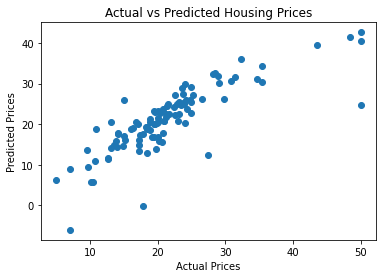

In [11]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['Price'] = boston.target  # Add the target column (price)

X = df.drop('Price', axis=1)  # Features
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}')


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Housing Prices")
plt.show()


In [ ]:
# gradient Desent algorithm

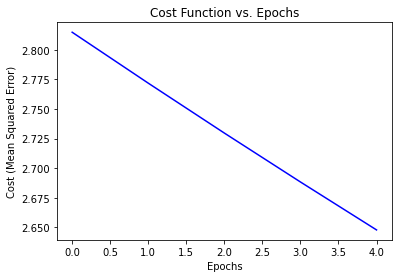

Optimal Intercept (theta_0): 0.10154601601078654
Optimal Slope (theta_1): 0.008980525284165188
Sklearn Linear Regression Intercept: 1.654762268596842
Sklearn Linear Regression Coefficient: 0.07675558963126737


In [15]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

X = X[['AveRooms']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.c_[np.ones(X_train_scaled.shape[0]), X_train_scaled]
X_test_scaled = np.c_[np.ones(X_test_scaled.shape[0]), X_test_scaled]

def gradient_descent(X, y, learning_rate=0.01, epochs=15):
    m = len(y)
    theta = np.zeros(X.shape[1])  
    cost_history = []

    for epoch in range(epochs):
        # Predictions
        y_pred = X.dot(theta)
        
        cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
        cost_history.append(cost)
        
        gradients = (1 / m) * X.T.dot(y_pred - y)
        
        theta -= learning_rate * gradients

    return theta, cost_history

theta_optimal, cost_history = gradient_descent(X_train_scaled, y_train)

plt.plot(range(len(cost_history)), cost_history, color='b')
plt.title('Cost Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost (Mean Squared Error)')
plt.show()

intercept, slope = theta_optimal
print(f"Optimal Intercept (theta_0): {intercept}")
print(f"Optimal Slope (theta_1): {slope}")

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print(f"Sklearn Linear Regression Intercept: {lr_model.intercept_}")
print(f"Sklearn Linear Regression Coefficient: {lr_model.coef_[0]}")
